# Домашнее задание 1
## Кирилл Сетдеков

# 1
Пусть дана реализация выборки из нормального распределения N (θ, 3). Проверьте несмещенность и состоятельность следующих оценок параметра θ ∈ R. Посчитайте значения этих оценок на следующих данных (n = 10):


In [48]:
t1_values = [-3.19, 2.25, 4.64, -0.39, -1.44, -1.87, -1.68, 0.27, 0.43, 0.58]
t1_n = 10 # число значений

(1) ${\hat{\theta}}_1 (x_1; ... ; x_n) = 0$

Несмещенная?

$E_{\theta}[{\hat{\theta}}_1 (x_1; ... ; x_n)]=E_{\theta}[0]=0 \neq \theta$ следовательно оценка ${\hat{\theta}}_1$ не является несмещенной.

Состоятельной?
Для значений, например, $\varepsilon = 0.1; \theta = 1$

$P(|{\hat{\theta}}_1 (x_1; ... ; x_n)- \theta| > \varepsilon) = P(|0-1| > 0.1) = 1 \not \rightarrow 0 $ Не выполняется, следовательно ${\hat{\theta}}_1$ не состоятельная.


In [49]:
f'значение оценки theta_1 равно {0}'

'значение оценки theta_1 равно 0'

(2) ${\hat{\theta}}_2 (x_1; ... ; x_n) = 2x_n$

Несмещенная?

$E_{\theta}[{\hat{\theta}}_2 (x_1; ... ; x_n)]=E_{\theta}[2 x_n]=2\theta \neq \theta$ следовательно оценка ${\hat{\theta}}_2$ не является несмещенной.

Состоятельной?

$P(|{\hat{\theta}}_2 (x_1; ... ; x_n)- \theta| > \varepsilon) = P(| 2x_n-\theta| > \varepsilon) = cons \not \rightarrow 0 $ Не выполняется, следовательно ${\hat{\theta}}_2$ не состоятельная.

In [50]:
print(f'значение оценки theta_2 равно {2 * t1_values[-1]:.2f}')

значение оценки theta_2 равно 1.16


(3) ${\hat{\theta}}_3 (x_1; ... ; x_n) = 2x_2 - x_3$

Несмещенная?

$E_{\theta}[{\hat{\theta}}_3 (x_1; ... ; x_n)]=E_{\theta}[2x_2 - x_3]=2\theta - \theta   = \theta$ следовательно оценка ${\hat{\theta}}_3$  несмещенная.

Состоятельной?

$P(|{\hat{\theta}}_3 (x_1; ... ; x_n)- \theta| > \varepsilon) = P(|2x_2 - x_3 -\theta| > \varepsilon) = cons \not \rightarrow 0 $ Не выполняется, следовательно ${\hat{\theta}}_3$ не состоятельная.

In [51]:
print(f'значение оценки theta_3 равно {2*t1_values[1] - t1_values[2] :.2f}')

значение оценки theta_3 равно -0.14


(4) ${\hat{\theta}}_4 (x_1; ... ; x_n) = (x_1 + x_2 + ... + x_n)/n$

Несмещенная?

$$E_{\theta}[{\hat{\theta}}_4 (x_1; ... ; x_n)]=E_{\theta}[(x_1 + x_2 + ... + x_n)/n]= \frac{n \theta}{n} = \theta$$ следовательно оценка ${\hat{\theta}}_4$  несмещенная.

Состоятельной?

$P(|{\hat{\theta}}_4 (x_1; ... ; x_n)- \theta| > \varepsilon) = ? $

Посчитать такую вероятность не интуитивно как, но мы знаем, что если оценка несмещенная, и ее дисперсия равна 0, когда $n \rightarrow \infty$, то эта оценка состоятельная.

$$\lim_{n \rightarrow \infty}{D({\hat{\theta}}_4 (x_1; ... ; x_n))} = \lim_{n \rightarrow \infty}{\frac{\sigma ^2}{n}} = \sigma ^2 \lim_{n \rightarrow \infty}{\frac{1}{n}} = \sigma ^2 (0) = 0$$
 Следовательно ${\hat{\theta}}_4$ состоятельная.

In [52]:
print(f'значение оценки theta_4 равно {sum(t1_values)/t1_n:.2f}')

значение оценки theta_4 равно -0.04


# 2
Найти оценку $\theta$ методом моментов и ММП.
## Методом моментов
Один параметр, следовательно мы ожидаем, что достаточно будет первого момента. 

$$A_1 = E[X] = \frac{\theta + 1 +\theta}{2} = \theta + 1/2$$
$$a_i = \frac{1}{n} \sum_{i=1}^{n}$$
Приравняем $A_1=a_i$:
$${\hat{\theta}}_{м}+\frac{1}{2}=\frac{1}{n} \sum_{i=1}^{n} \Rightarrow {\hat{\theta}}_{м}=\frac{1}{n} \sum_{i=1}^{n} - \frac{1}{2}$$


## Методом максимального правдоподобия

Запишем плотность распределения в зависимости от $\theta$:



![q2 extimates](p2.jpg)

# 3
Найти оценку $\theta$ методом моментов и ММП. 

сначала запишем решение теоретическое

![q3 extimates](p3.jpg)

In [53]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

In [54]:
# генерируем параметр theta
np.random.seed(80085) 
theta = np.random.uniform(25,50)
print(f'Истинное значение параметра theta: {theta:.3f}')

Истинное значение параметра theta: 33.878


In [55]:
# генерируем выборки, записываем их в словарь
samples = { 10**i: np.random.uniform(low=0, high=theta,size=10**i) for i in range(1,6)}
q3_results = pd.DataFrame(columns = ['n', 'оценка методом моментов', 'оцибка ММ', 'метод макс. правдоподобия', 'ошибка ММП', 'SciPy fit', 'ошибка SciPy fit'])

# считаем оценки, записываем их в DF и выводим результаты
for n,sample in samples.items():
    
    theta_hat_m = 2 * np.mean(sample)
    theta_hat_mmp = max(sample)
    theta_hat_scipy = stats.uniform.fit(sample, floc=0)[1]

    to_append = [int(n), theta_hat_m, np.abs(theta_hat_m-theta), theta_hat_mmp, np.abs(theta_hat_mmp-theta), theta_hat_scipy, np.abs(theta_hat_scipy-theta)]
    a_series = pd.Series(to_append, index = q3_results.columns)
    q3_results = q3_results.append(a_series, ignore_index=True)

q3_results.set_index('n', inplace=True)
q3_results

,оценка методом моментов,оцибка ММ,метод макс. правдоподобия,ошибка ММП,SciPy fit,ошибка SciPy fit
n,,,,,,
10.0,35.691872,1.814068,32.092106,1.785697,32.092106,1.785697
100.0,37.631489,3.753686,33.503512,0.374291,33.503512,0.374291
1000.0,34.205870,0.328067,33.851822,0.025981,33.851822,0.025981
10000.0,33.913334,0.035531,33.877296,0.000507,33.877296,0.000507
100000.0,34.026859,0.149055,33.877616,0.000187,33.877616,0.000187


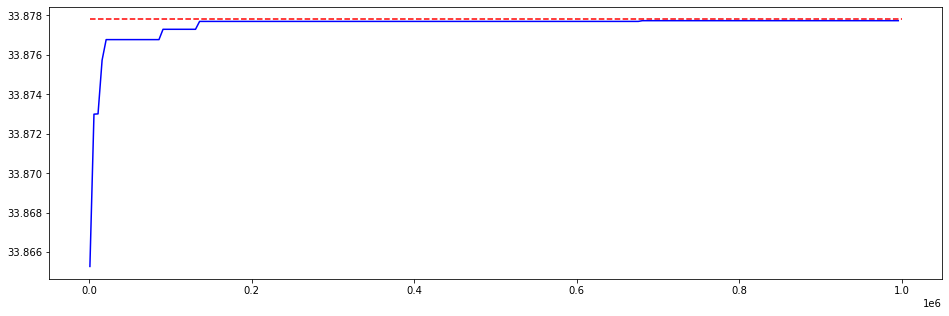

In [56]:
# герерируем новую выборку 
sample = np.random.uniform(low=0, high=theta,size=10**6)

# в переменных x и y будем хранить размер выборки и значение оценки, посчитанной для этого размера выборки 
x,y = [],[]
for size in range(1000,10**6,5000):
    x.append(size)
    y.append(stats.uniform.fit(sample[:size], floc=0)[1])  

# нарисуем график изменения оценки
# синяя линия — значение оценки, красная — истинное значение оценки

fig = plt.figure(figsize=(16,5)) 

plt.plot(x, y, color='blue'); 
plt.hlines(y=theta, xmin=1000, xmax=1000000, color='r', linestyles='dashed')

plt.show()

# 4
Найти оценку $\theta$ методом моментов и ММП. 

сначала запишем решение теоретическое

![q4 extimates](p4.jpg)

In [57]:
# генерируем параметр theta
np.random.seed(80085) 
theta_1 = np.random.uniform(25,50)
print(f'Истинное значение параметра theta_1: {theta_1:.3f}')
theta_2 = np.random.uniform(0.1, 10)
print(f'Истинное значение параметра theta_2^2: {theta_2:.3f}')

Истинное значение параметра theta_1: 33.878
Истинное значение параметра theta_2^2: 0.378


## $\theta_1$

In [60]:
# генерируем выборки, записываем их в словарь
samples = { 10**i: np.random.normal(loc=theta_1, scale=np.sqrt(theta_2),size=10**i) for i in range(1,6)}
q4_results_t1 = pd.DataFrame(columns = ['n', 'оценка методом моментов', 'оцибка ММ', 'метод макс. правдоподобия', 'ошибка ММП', 'SciPy fit', 'ошибка SciPy fit'])

# считаем оценки, записываем их в DF и выводим результаты
for n,sample in samples.items():
    
    theta_hat_m = np.mean(sample)
    theta_hat_scipy = stats.normal.fit(sample)

    to_append = [int(n), theta_hat_m, np.abs(theta_hat_m-theta), theta_hat_mmp, np.abs(theta_hat_mmp-theta), theta_hat_scipy, np.abs(theta_hat_scipy-theta)]
    a_series = pd.Series(to_append, index = q3_results.columns)
    q4_results_t1 = q4_results_t1.append(a_series, ignore_index=True)

q4_results_t1.set_index('n', inplace=True)
q4_results_t1

AttributeError: module 'scipy.stats' has no attribute 'normal'

In [62]:
stats.uniform()